# Dynamic Programming Misc. Problems

# **Minimum Number of Steps to reach n**

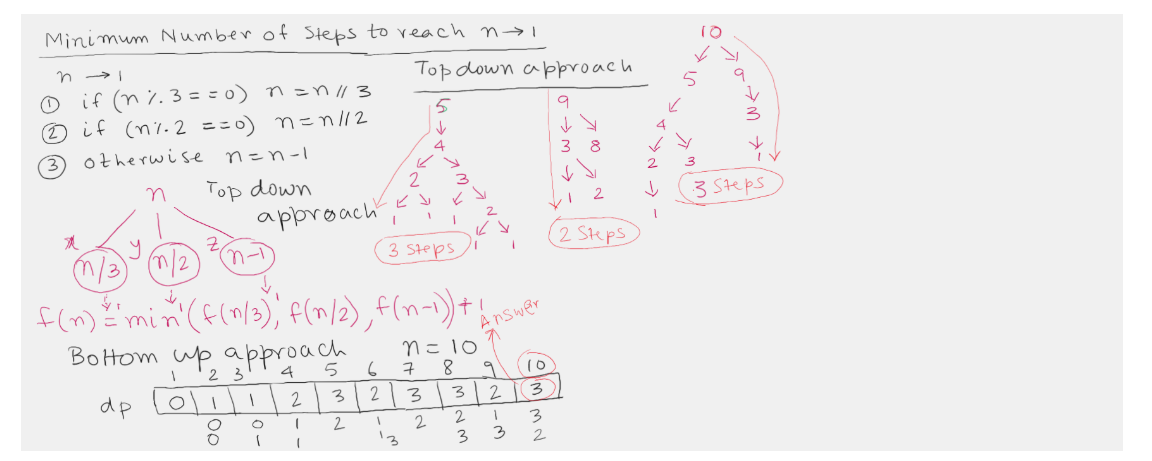

In [8]:
# Minimum number of steps to reach one
import math
def MinStepsToOneTopDown(n, dp):
    # base case
    if n == 1: return 0
    # recursive case
    # Lookup if n is already compuetd or not
    if dp[n] != 0: return dp[n]
    # compute if dp[n] is noty known (for the first time0
    op1 = op2 = op3 = math.inf
    if n % 3 == 0: op1 = MinStepsToOneTopDown(n // 3, dp) + 1
    if n % 2 == 0: op2 = MinStepsToOneTopDown(n // 2, dp) + 1
    op3 = MinStepsToOneTopDown(n - 1, dp) + 1
    answer = min(op1, op2, op3)
    dp[n] = answer
    print(n, dp)
    return answer
n = 10
dp = [0] * (n + 1)
print(MinStepsToOneTopDown(n, dp))

2 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
3 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
4 [0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0]
5 [0, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0]
6 [0, 0, 1, 1, 2, 3, 2, 0, 0, 0, 0]
7 [0, 0, 1, 1, 2, 3, 2, 3, 0, 0, 0]
8 [0, 0, 1, 1, 2, 3, 2, 3, 3, 0, 0]
9 [0, 0, 1, 1, 2, 3, 2, 3, 3, 2, 0]
10 [0, 0, 1, 1, 2, 3, 2, 3, 3, 2, 3]
3


In [17]:
def MinStepsToOneBottomUP(n):
    dp = [0] * (n + 1)
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + 1
        if i % 2 == 0: dp[i] = min(dp[i], dp[i // 2] + 1)
        if i % 3 == 0: dp[i] = min(dp[i], dp[i // 3] + 1)
    print(dp)
    return dp[n]
n = 10
print(MinStepsToOneBottomUP(n))

[0, 0, 1, 1, 2, 3, 2, 3, 3, 2, 3]
3


In [18]:
# Leetcode - 70
# Climbing Stairs
class Solution(object):
    def climbStairs(self, n):
        if n==1: return 1
        if n==2: return 2
        dp = [0]*(n+1)
        dp[1]= 1
        dp[2] = 2
        for j in range(3,n+1):
            dp[j] = dp[j-1] +dp[j-2]
        print(dp)
        return dp[n]
print(Solution().climbStairs(10))

[0, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
89


# **Keyboard Row**

In [ ]:
# Leetcode - 500
# Logic - 1
class Solution(object):
    row1 = set("qwertyuiop")
    row2 = set("asdfghjkl")
    row3 = set("zxcvbnm")

    def inarow(self, word):
        w = word.lower()
        if w[0] in Solution.row1:
            target = Solution.row1
        elif w[0] in Solution.row2:
            target = Solution.row2
        else:
            target = Solution.row3
        
        return all(ch in target for ch in w)

    def findWords(self, words):
        """
        :type words: List[str]
        :rtype: List[str]
        """
        return [w for w in words if self.inarow(w)]

In [26]:
# Logic - 2
class Solution(object):
    def findWords(self, words):
        """
        :type words: List[str]
        :rtype: List[str]
        """
        rowset1 = set("qwertyuiop")
        rowset2 = set("asdfghjkl")
        rowset3 = set("zxcvbnm")
        result = []
        for word in words:
            wordset = set(word.lower())
            if wordset.issubset(rowset1) or wordset.issubset(rowset2) or wordset.issubset(rowset3):
                result.append(word)
        return result
print(Solution().findWords(["Hello","Alaska","Dad","Peace"]))

['Alaska', 'Dad']


# **Longest Common Subsequence (LCS)**

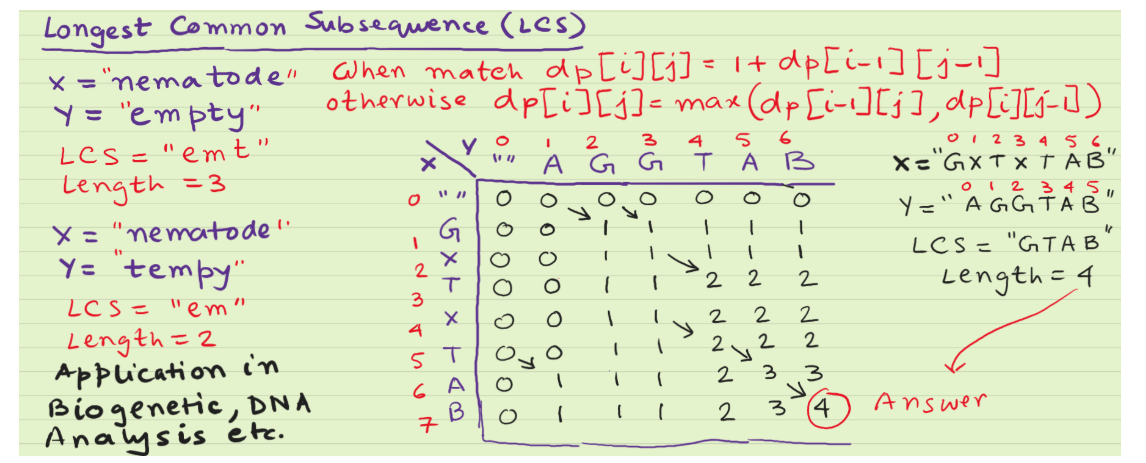

In [29]:
# Leetcode - 1143
class Solution(object):
    def longestCommonSubsequence(self, text1, text2):
        m, n = len(text1), len(text2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if text1[i - 1] == text2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                else:
                    dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
        for i in range(len(dp)): print(dp[i])
        return dp[m][n]

print(Solution().longestCommonSubsequence(text1 = "gxtxtab", text2 = "aggtab")) 

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 2, 2, 2]
[0, 0, 1, 1, 2, 2, 2]
[0, 0, 1, 1, 2, 2, 2]
[0, 1, 1, 1, 2, 3, 3]
[0, 1, 1, 1, 2, 3, 4]
4


# Minimum Path Sum

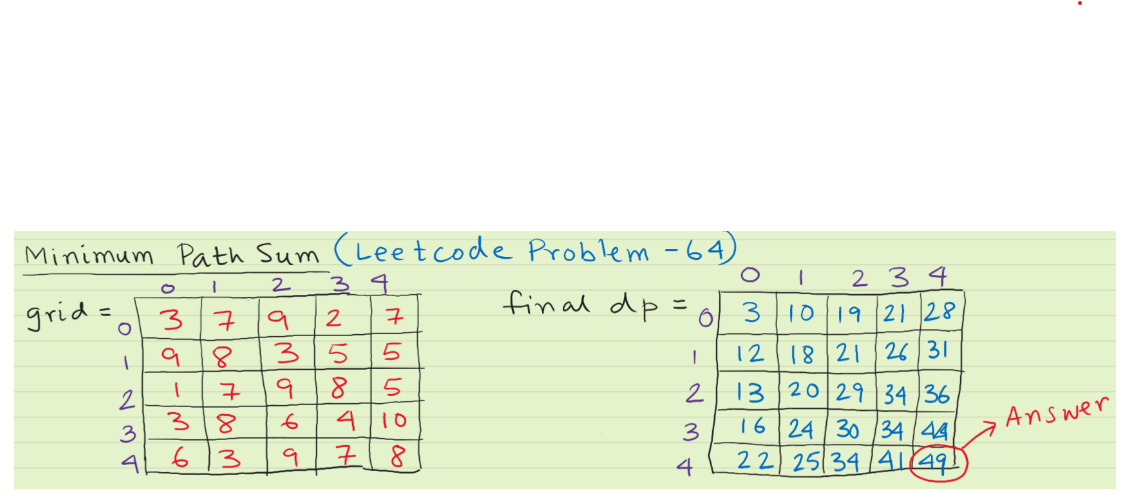

In [34]:
# Leetcode - 64
class Solution(object):
    def minPathSum(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        m, n = len(grid), len(grid[0])
        dp = [[0] * n for _ in range(m)]
        dp[0][0] = grid[0][0]
        for j in range(1, n):
            dp[0][j] = dp[0][j - 1] + grid[0][j]
        for i in range(1, m):
            dp[i][0] = dp[i - 1][0] + grid[i][0]
        for i in range(1, m):
            for j in range(1, n):
                dp[i][j] = min(dp[i - 1][j], dp[i][j - 1]) + grid[i][j]
        for row in dp:
            print(row)

        return dp[-1][-1]


print(Solution().minPathSum(grid = [[3,7,9, 2, 7],[9, 8, 3, 5, 5],[1, 7, 9, 8, 5], [3, 8, 6, 4, 10], [6, 3, 9, 7, 8]]))

[3, 10, 19, 21, 28]
[12, 18, 21, 26, 31]
[13, 20, 29, 34, 36]
[16, 24, 30, 34, 44]
[22, 25, 34, 41, 49]
49


# **Wines Problem**

Prices of n bottles of wine have been stored in an array of size n. The price of i-th bottle of wines 
will be at the i-th index of that array. We can sell either the left-end or the right-end bottle of wine, one each year. 
If the price of the bottle is p and the year number is y, then the selling price will be p * y. Find the maximum total. 
selling price can be obtained after selling all n bottles of wine.

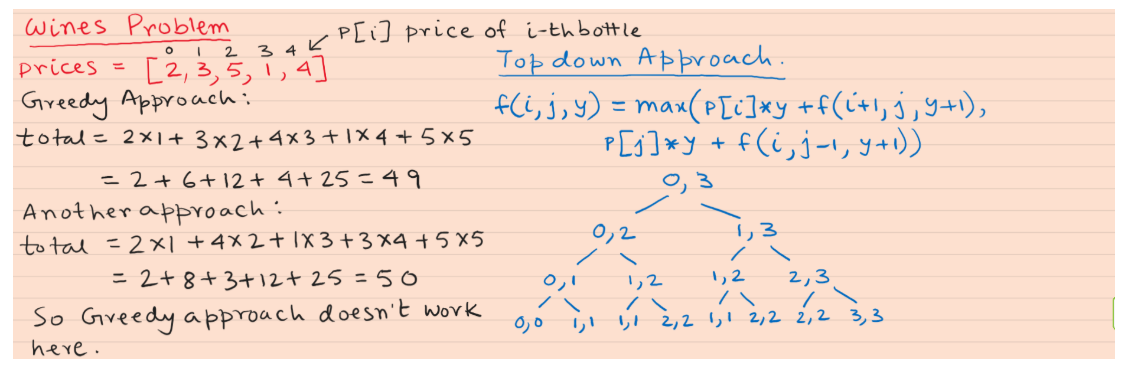

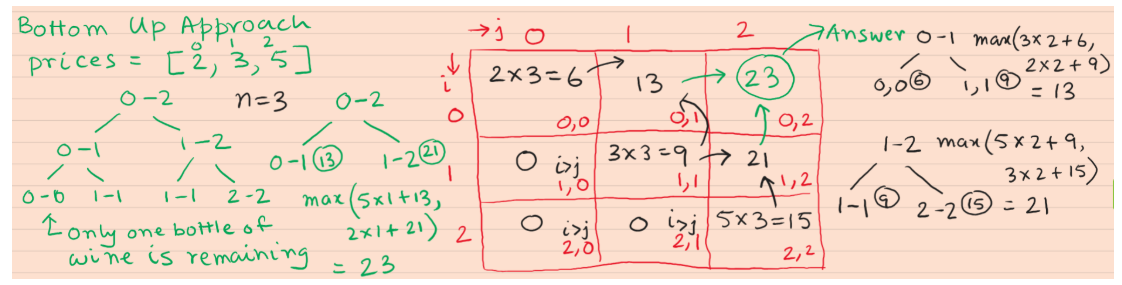

In [35]:
# Without DP
def WineprofitTopDown(wines, i, j, y):
    # base case
    if i > j: return 0
    # recursive case
    op1 = wines[i] * y + WineprofitTopDown(wines, i + 1, j, y + 1)
    op2 = wines[j] * y + WineprofitTopDown(wines, i, j - 1, y + 1)
    return max(op1, op2)

wines = [2, 3, 5]
print(WineprofitTopDown(wines, 0, len(wines) - 1, 1))

23


In [38]:
# Without DP
def WineprofitTopDown(wines, i, j, y):
    # base case
    if i > j: return 0
    # return the result if dp[i][j] already computed
    if dp[i][j] != 0: return dp[i][j]
    # recursive case
    op1 = wines[i] * y + WineprofitTopDown(wines, i + 1, j, y + 1)
    op2 = wines[j] * y + WineprofitTopDown(wines, i, j - 1, y + 1)
    dp[i][j] = max(op1, op2)
    return dp[i][j]
wines = [2, 3, 5]
n = len(wines)
dp = [[0 for i in range(n)] for j in range(n)]
print(WineprofitTopDown(wines, 0, n - 1, 1))
for i in range(n): print(dp[i])

23
[6, 13, 23]
[0, 9, 21]
[0, 0, 15]


# Alternative Square Pattern

In [5]:
n = int(input())
difference = 9
ll = 1
ul = 5
step = 1
for i in range(n):
    for j in range(ll, ul + step, step):
        print(str(j) + " ", end = "")
    ll += difference
    difference = 10 - difference
    ul += difference
    step = -step
    print()

 4


1 2 3 4 5 
10 9 8 7 6 
11 12 13 14 15 
20 19 18 17 16 
